# Predicting hospital admission at emergency department triage

**Main statement**
Using machine learning, how might we predict the patient admission into the hospital in the emergency department to provide better information that helps the different stakeholders make better decisions.


## Introduction

Emergency departments (ED) are the hospitals' areas where it is provided treatment for patients with severe illnesses and life-threatening injuries 24 hours a day, 365 days a year. Patients of all ages and a nearly infinite variety of conditions and degrees of illness can require attention in emergency rooms and the approach to treatment in an emergency department can vary dramatically from case to case, even for the same medical condition. Emergency departments are places with high-level pressure and are fast-paced. EDs often become overcrowded due to the variety of complaints and injuries they have to deal with, which can be quite complex. Despite the fact that the majority of patients are discharged from the emergency department, it usually is the primary source of hospital admissions.

Triage is one of the most common tools used to improve ED operational performance. It is utilized to sort incoming patients into groups according to their urgency level. There are several tools/scales developed in order to assist the health provider to categorize the patient. Typically, a nurse does the first evaluation based on various factors, including demographics, chief complaints, and vital signs, in order to carry out triage. Once is triaged, the patient is examined by a physician, who evaluates the patient disposition: admitted or discharged. However, the described process tends to highly depend on the medical provider’s knowledge and experience. 

Advantages of optimizing the process of triage and admission of a patient in the emergency department:

- Patients: better opportunity, safety and satisfaction. Reduce complications, adverse events, patient morbidity and mortality.
- Healthcare providers: support in decision making and not only to emergency professionals, prediction could help primary health services to define if the patient needs to consult the emergency room.
- Hospitals management: support decision-making regarding resources management, patient flow, and healthcare spending. Improve indicators like stay length, readmission rates, and support protocol definitions. 

With hospitals increasing adoption of electronic health records and data warehousing, it has been easier to apply statistical models to improve healthcare processes. Many groups have done predictive models to apply to admission disposition in emergency departments.

Selection of variables
- Based on a review of the literature
- Expert consensus 
- Expected relevance and availability
- Related only to the current attention vs including information about past events and medical history

Statistical models
- Classical statistical multivariable logistic regression.
- Naive Bayes.
- Random forest.
- Gradient boosted decision trees (XGBoost) model. 
- Deep neural network.
- Support vector machines. 
- Cox proportional hazards (CPH) model. 
- Tabu Search (TS).
- T-ADAB integrates Adaboost. 
- AUC Score.
- AUROC.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
from scipy import stats



**Declaration of Use of another Machine Learning Project's Data**

The dataset used in this project was originally collected and published by Hong WS, Haimovich AD, Taylor RA (2018) in their paper, 'Predicting hospital admission at emergency department triage using machine learning.' I will be using this dataset as a starting point for my own data science project, with the aim of further exploring the relationships and patterns that were observed in the original study.

The raw data used in the original study was derived from electronic health records of patient visits to the Yale New Haven Health system and is not publicly available due to the ubiquitous presence of protected health information (PHI). A de-identified, processed dataset of all patient visits included in the models, as well as scripts used for processing and analysis, are available on the Github repository (https://github.com/yaleemmlc/admissionprediction) (10.5281/zenodo.1308993). All other data is available within the paper and its Supporting Information files.

Original paper: Hong WS, Haimovich AD, Taylor RA (2018) Predicting hospital admission at emergency department triage using machine learning. PLoS ONE 13(7): e0201016. https://doi.org/10.1371/journal.pone.0201016

## Dataset description

The data covers:
- 3 emergency departments that belonged to the same hospital system, then they used the same electronic health record and the same Emergency Severity Index.
- level I trauma center with an annual census of approximately 85,000 patients, a community hospital-based department with an annual census of approximately 75,000 patients, and a suburban, free-standing department with an annual census of approximately 30,000 patients.
- March 2013 to July 2017 to ensure a 1-year of historical timeframe from the study start period of March 2014 
- Adult attentions that had clearly described the disposition.
- 972 variables, divided into major categories shown in Table. 
- Data elements were obtained by the researchers from the enterprise data warehouse, using SQL queries to extract relevant raw-data in comma-separated value format. All subsequent processing was done in R. 

|             Variable category            | Number of variables |
|:-------------------------------:|:-------------------:|
| Response variable (Disposition) |          1          |
|           Demographics          |          9          |
|        Triage evaluation        |          13         |
|         Chief complaint         |         200         |
|     Hospital usage statistic    |          4          |
|       Past medical history      |         281         |
|      Outpatient medications     |          48         |
|        Historical vitals        |          28         |
|         Historical labs         |         379         |
|       Imaging / EKG counts      |          9          |
|              Total              |         972         |

Variables description

Response variable: The primary response variable was the patient's disposition, encoded in a binary variable (1 = admission, 0 = discharge).

Demographics: included age, gender, primary language, ethnicity, employment status, insurance status, marital status, and religion. The primary language variable was recoded into a binary split (e.g., English vs. non-English), while the top twelve levels comprising >95% of all visits were retained for the religion variable and all other levels binned to one 'Other' category. All unique levels were retained for other demographic variables.

Triage evaluation: included variables routinely collected at triage, such as the name of presenting hospital, arrival time (month, day, 4-hr bin), arrival method, triage vital signs, and ESI level assigned by the triage nurse. Triage vital signs included systolic and diastolic blood pressure, pulse, respiratory rate, oxygen saturation, presence of oxygen device, and temperature. Values beyond physiologic limits were replaced with missing values.

Chief complaint: the top 200 most frequent values, which comprised >90% of all visits, were retained as unique categories and all other values binned into 'Other'.

Hospital usage statistic: This include the number of ED visits within one year, the number of admissions within one year, the disposition of the patient's previous ED visit, and the number of procedures and surgeries listed in the patient's record at the time of encounter.

Past medical history: 281 clinically meaningful categories according the Agency for Healthcare Research and Quality (AHRQ) Clinical Classification Software (CCS), each CCS category became a binary variable with the value 1 if the patient's past medical history contained one or more ICD-9 code belonging in that category and 0 otherwise.

Outpatient medications: binned into 48 therapeutic subgroups (e.g. cardiovascular, analgesics), each corresponding variable representing the number of medications in that subgroup, the medication should be active in the moment of the triage.

Historical vitals: A time-frame of one year from the date of patient encounter was used to calculate historical information, which included vital signs, labs and imaging previously ordered from any of the three EDs. Historical vital signs were represented by the minimum, maximum, median, and the last recorded value of systolic blood pressure, diastolic blood pressure, pulse, respiratory rate, oxygen saturation, presence of oxygen device, and temperature. **Values beyond physiologic limits were replaced with missing values.**

Historical labs: Given the diversity of labs ordered within the ED, the 150 most frequent labs comprising 94% of all orders were extracted then divided into labs with numeric values and those with categorical values. The cutoff of 150 was chosen to include labs ordered commonly enough to be significant in the management of most patients (e.g., Troponin T, BNP, CK, D-Dimer), even if they were not as frequent as routine labs like CBC, BMP, and urinalysis. The minimum, maximum, median, and the last recorded value of each numeric lab were included as features. Categorical labs, which included urinalysis and culture results, were recoded into binary variables with 1 for any positive value (e.g. positive, trace, +, large) and 0 otherwise. Any growth in blood culture was labeled positive as were urine cultures with > 49,000 colonies/mL. The number of tests, the number of positives, and the last recorded value of each categorical lab were included as features.

Imaging and EKG counts: The number of orders were counted for each of the following categories: electrocardiogram (EKG), chest x-ray, other x-ray, echocardiogram, other ultrasound, head CT, other CT, MRI, and all other imaging.


## Exploratory Data Analysis

Load the data

In [ ]:
# Load data to google coolab  from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data to google coolab from drive
# del df
df=pd.read_csv('/content/drive/MyDrive/5v_cleandf.csv', nrows=350000, skiprows=0)
#gc.collect()

In [ ]:
# Load the data in Anaconda
#df = pd.read_csv('/home/sergio/Downloads/Data Science/Capstone/Capstone Data/Admision prediction/5v_cleandf.csv', nrows=10000)
#df 

The dataset looks clean.

In [ ]:
# Shape
df.shape

(350000, 973)

The real shape is (560.000 rows and 973 columns), this dataset is limited by my current computer's capacity

In [ ]:
# First rows
df.head()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,1,B,4.0,40.0,Male,Hispanic or Latino,White or Caucasian,English,None,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,B,4.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,B,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,A,2.0,66.0,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,A,3.0,84.0,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Last rows
df.tail()

,Unnamed: 0,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
349995,349996,A,3.0,25.0,Female,Hispanic or Latino,Other,English,None,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349996,349997,C,3.0,83.0,Male,Non-Hispanic,White or Caucasian,English,Other,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349997,349998,A,2.0,66.0,Female,Non-Hispanic,White or Caucasian,English,Episcopal,Married,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349998,349999,A,2.0,34.0,Female,Non-Hispanic,Black or African American,English,Baptist,Single,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349999,350000,A,3.0,71.0,Female,Non-Hispanic,White or Caucasian,English,Catholic,Widowed,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Cleaning

In [ ]:
# check if the  unique elements is the same as the number of rows
df["Unnamed: 0"].nunique() == df.shape[0]

True

In [ ]:
# quick summary of each column, the datatypes,
# and the number of non-null values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350000 entries, 0 to 349999
Columns: 973 entries, Unnamed: 0 to cc_wristpain
dtypes: float64(590), int64(368), object(15)
memory usage: 2.5+ GB


In [ ]:
# Numeric columns, .T to take the transpose, this makes the columns the rows
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,350000.0,175000.500000,101036.441446,1.0,87500.75,175000.5,262500.25,350000.0
esi,348653.0,3.014937,0.856476,1.0,2.00,3.0,4.00,5.0
age,349999.0,51.515047,20.343616,18.0,34.00,51.0,66.00,108.0
2ndarymalig,350000.0,0.002057,0.045309,0.0,0.00,0.0,0.00,1.0
abdomhernia,350000.0,0.034883,0.183483,0.0,0.00,0.0,0.00,1.0
...,...,...,...,...,...,...,...,...
cc_woundcheck,348352.0,0.004151,0.064294,0.0,0.00,0.0,0.00,1.0
cc_woundinfection,348352.0,0.002902,0.053794,0.0,0.00,0.0,0.00,1.0
cc_woundre-evaluation,348352.0,0.001249,0.035315,0.0,0.00,0.0,0.00,1.0
cc_wristinjury,348352.0,0.001381,0.037133,0.0,0.00,0.0,0.00,1.0


In [ ]:
# Non numeric columns
df.select_dtypes('object').head()

,dep_name,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,insurance_status,disposition,arrivalmode,arrivalmonth,arrivalday,arrivalhour_bin,previousdispo
0,B,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,Other,Discharge,Walk-in,June,Tuesday,23-02,No previous dispo
1,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,January,Tuesday,15-18,No previous dispo
2,B,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Walk-in,July,Thursday,11-14,Discharge
3,A,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,Commercial,Discharge,Car,July,Saturday,11-14,Discharge
4,A,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,Medicare,Admit,Walk-in,November,Tuesday,07-10,Discharge


In [ ]:
# Columns names
df.columns.values

array(['Unnamed: 0', 'dep_name', 'esi', 'age', 'gender', 'ethnicity',
       'race', 'lang', 'religion', 'maritalstatus', 'employstatus',
       'insurance_status', 'disposition', 'arrivalmode', 'arrivalmonth',
       'arrivalday', 'arrivalhour_bin', 'previousdispo', '2ndarymalig',
       'abdomhernia', 'abdomnlpain', 'abortcompl', 'acqfootdef',
       'acrenlfail', 'acutecvd', 'acutemi', 'acutphanm',
       'adjustmentdisorders', 'adltrespfl', 'alcoholrelateddisorders',
       'allergy', 'amniosdx', 'analrectal', 'anemia', 'aneurysm',
       'anxietydisorders', 'appendicitis', 'artembolism', 'asppneumon',
       'asthma', 'attentiondeficitconductdisruptivebeha', 'backproblem',
       'biliarydx', 'birthasphyx', 'birthtrauma', 'bladdercncr',
       'blindness', 'bnignutneo', 'bonectcncr', 'bph', 'brainnscan',
       'breastcancr', 'breastdx', 'brnchlngca', 'bronchitis', 'burns',
       'cardiaarrst', 'cardiacanom', 'carditis', 'cataract',
       'cervixcancr', 'chestpain', 'chfnonhp', 

Look for missing values

In [ ]:
# NaN or Null Values
df.isna().sum(axis=0)
# df.isna().sum().sum()

Unnamed: 0                  0
dep_name                    0
esi                      1347
age                         1
gender                      0
                         ... 
cc_woundcheck            1648
cc_woundinfection        1648
cc_woundre-evaluation    1648
cc_wristinjury           1648
cc_wristpain             1648
Length: 973, dtype: int64

In [ ]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

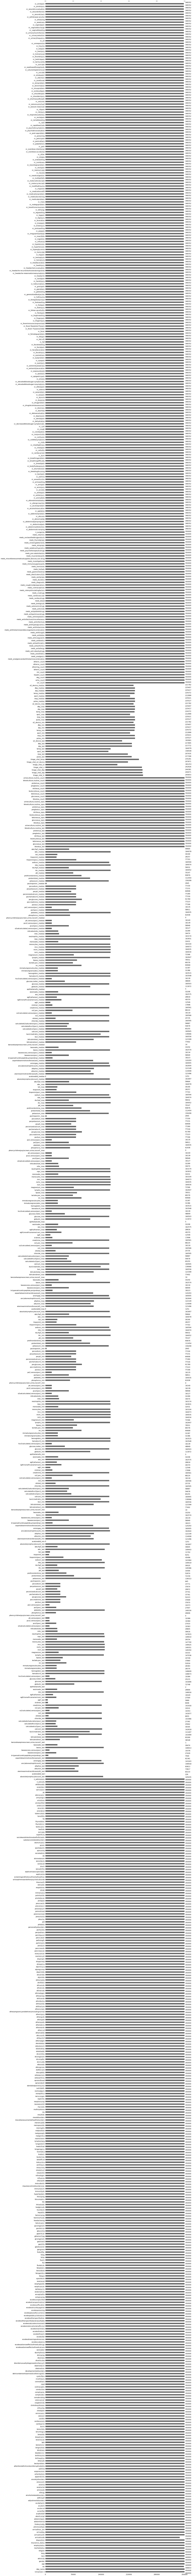

In [ ]:
# Gives a bar chart of the missing values
msno.bar(df)

I have to evaluate this result with the whole dataset.

OPTIONS:

**Deletion**
    
   Deletion is when we simply remove data that is missing.
   - *List-wise deletion* is simply the process of deleting rows of data that have missing data in any of the columns. A downside here is that we lose the data for this row which was not missing.
   - *Pairwise deletion* is the process of excluding the missing values selectively when carrying out statistical analysis. For example, if we had 5 rows for a particular column, and 1 of the rows had a `NaN`. When calculating the average, pairwise deletion would simply ignore this row and calculate the average as if the column only had 4 rows. The issue here is that its hard to compare between columns which have had statistics calculated on different numbers of rows.
   - *Column deletion* is the process of removing entire columns. This is usually employed when we have a very high percentage of missing data in an individual column.
   
**Imputation**
  
  Imputation is the process of filling in the missing values with numbers based on our expectation of what the true values for the missing values would be. This is a very deep area with numerous methods that can be applied. 
  
  For now, lets focus on two simple methods:
   - *Mean imputation* is the process of filling in missing values with the average of the non-missing data from that column.
   - *Median imputation* is the process of filling in the missing values with the median (mid-point) of the non-missing data from that column.

**General rules of thumb for imputation**

There is not a single approach to imputation that you can take that applies to all datasets. You will need to tailor your approach to the particular situation you find yourself in. With that being said, there are some rules of thumb which you will be to apply to the majority of cases.

- If the missing data makes up less than 3% of the total observations in a column, your approach will not make much of a difference.

- Depending on the data, 50% of missing data in a column can be a good threshold to remove the column entirely, sometimes it may be less. Consider the following:

    - Is the mean/median calculated from only <=50% of the column a good representation of the true mean/median?   
    - You will be skewing the distribution too heavily. If half your column was missing, then 50% of the post-imputation values would be exactly the same!


- If the goal of your analysis is prediction, try various strategies and compare results. There is nothing preventing you from creating different versions of your dataset. You can apply various techniques, observe the results, and proceed with the one that leads to the best performance.

In [ ]:
# Duplicated columns, sum the resultant array to get the total number of duplicate rows
df.duplicated(keep=False).sum()

0

There is not duplicated columns

### Basic Data Analysis

Now that we have a clean dataset we can begin analyzing it to begin developing some insights about the data itself. 

The key tool at this stage are visualizations. We can create useful visuals  to help us learn more about our data. In particular we want to try and cover the following points/questions:  

1. Identify variables which are useful and relevant to what we want to study. 
2. Identify trends and relationships between variables that help us answer our question(s).
3. Do the answers to the above lead to any other areas of investigation? 

It should be noted that there isn't one correct process to follow. However if you cover the above points you are in a good position to begin more detailed analysis and modeling tasks later on.


Explore metrics of interest, what is the data telling, uncover relationships and properties, visualizations

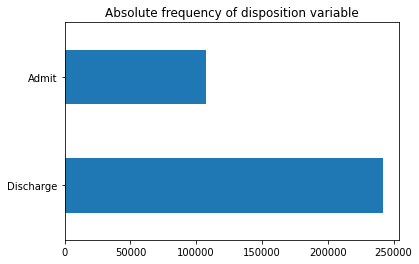

In [ ]:
# Plot the disposition result
plt.figure()
df['disposition'].value_counts(dropna=False).plot(kind="barh")
plt.title('Absolute frequency of disposition variable')
plt.show()

A couple of relevant insights that these graphs reveal are:
-
-
-
-

## Advance Data Analysis

Which are the most meaningful variables to predict patient admission?

**TO DO:**

-